# **Drug Classification Prediction**
Model yang di gunakan:

*   K Neighbours
*   Random Forest

# **Import Library**

In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# read file
df = pd.read_csv('drug200.csv') 
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Remove Missing Data
- Menghapus baris yang mengandung missing data/ missing value , dengan menetapkan axis = 0

In [ ]:
# Hapus kolom dengan missing value
df = df.dropna(axis=0)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


- Menghapus kolom yang mengandung missing data/ missing value , dengan menetapkan axis = 1

In [ ]:
# Hapus kolom dengan missing value
df = df.dropna(axis=1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.9+ KB
None


In [ ]:
# Cek missing values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# Cek duplikasi data

duplicate = df[df.duplicated()]
duplicate

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


## Dari hasil di atas, tidak ada nilai yang hilang (*missing value*) dan *duplicate data* dalam dataset ini

# **Eksplorasi Data**

## *Kategori Kolom*

In [ ]:
#Kolom Umur (Age of the Patient)
df.Age.value_counts()

47    8
49    7
23    7
28    7
39    6
32    6
50    5
22    5
58    5
37    5
60    5
43    4
42    4
41    4
74    4
51    4
34    4
31    4
26    4
24    4
20    4
36    4
45    4
72    4
56    4
57    4
68    4
67    4
65    4
61    4
64    3
35    3
16    3
18    3
70    3
69    3
53    3
15    3
40    3
38    3
59    3
55    2
48    2
19    2
46    2
73    2
52    2
66    2
29    2
62    2
33    1
25    1
21    1
30    1
54    1
17    1
63    1
Name: Age, dtype: int64

In [ ]:
#Kolom Jenis Kelamin (Sex, Gender of the patients)
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
#Kolom Tekanan Darah (Blood Pressure Levels)
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
#Kolom Kolesterol (Cholesterol Levels)
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
#Kolom Na_to_K/Natrium ke Kalium (Sodium to potassium Ration in Blood)
df.Na_to_K.value_counts()

12.006    2
18.295    2
9.945     1
9.475     1
20.013    1
         ..
13.884    1
7.285     1
22.905    1
7.340     1
8.750     1
Name: Na_to_K, Length: 198, dtype: int64

In [ ]:
#Kolom Drug
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

# **Describe Data**

In [ ]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# Cari minimum and maximum dari kolom Age

print("Minimum Age Adalah {} Tahun".format(df['Age'].min()))
print("Maximum Age Adalah {} Tahun".format(df['Age'].max()))

Minimum Age Adalah 15 Tahun
Maximum Age Adalah 74 Tahun


In [ ]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [ ]:
skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


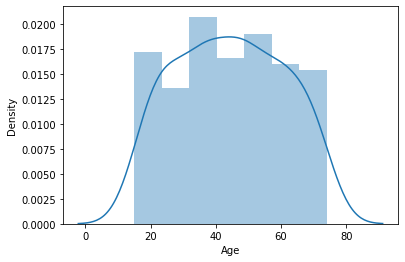

In [ ]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


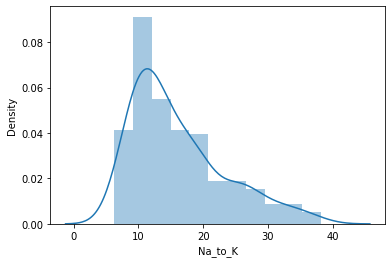

In [ ]:
sns.distplot(df['Na_to_K'])

## Distribusi kolom 'Age' adalah simetris, karena nilai skewness antara -0,5 dan 0,5 Distribusi kolom 'Na_to_K' cukup miring, karena nilai skewness antara 0,5 dan 1. Dapat juga dilihat pada histogram kolom 'Na_to_K'

# **EDA (Exploratory Data Analysis)**

findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.
findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.


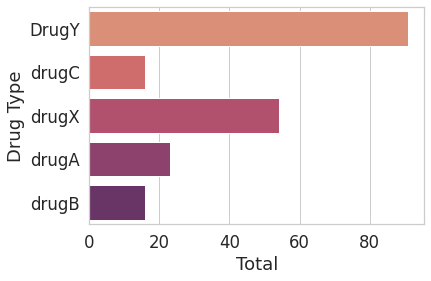

In [ ]:
# Menentukan tema visual untuk semua plot matplotlib dan seaborn. ex: whitegrid, darkgrid, dark, white
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", font='tahoma', font_scale=1.5)
# Menunjukkan jumlah pengamatan di setiap kategori menggunakan bar.
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(
    # nama kolom
    y="Drug",
    # data yang di load
    data=df,
    # warna palette ex: flare, dark, pastel, muted, deep, tab10, crest, magma
    palette="flare") 
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.


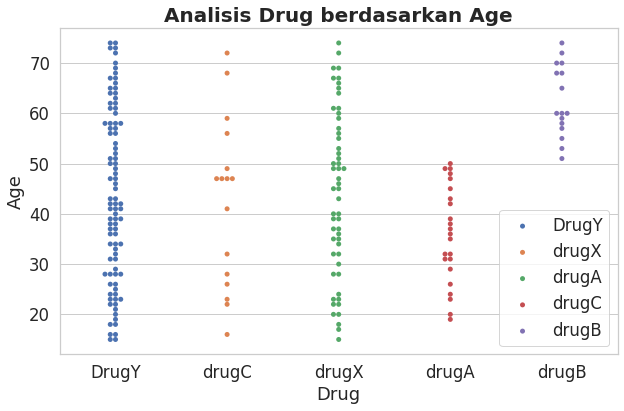

In [ ]:
# Analisis Drug berdasarkan Age

# Atribut figsize memungkinkan kita untuk menentukan lebar dan tinggi suatu gambar dalam satuan inci
plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Age", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Analisis Drug berdasarkan Age", fontsize=20, fontweight='bold')
plt.show()

Pengamatan :


*   drugA hanya diberikan kepada pasien yang berusia antara 19 hingga 50 tahun.
*   drugB hanya diberikan kepada pasien di atas 50 tahun.
*   DrugY, drugC dan drugX dapat diberikan kepada semua kelompok umur.



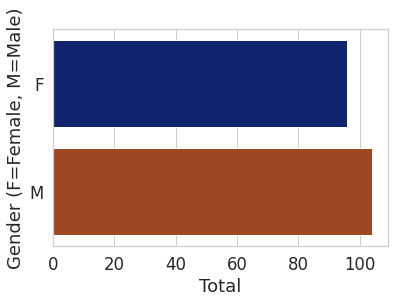

In [ ]:
# Menentukan tema visual untuk semua plot matplotlib dan seaborn. ex: whitegrid, darkgrid, dark, white
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", font='tahoma', font_scale=1.5)
# Menunjukkan jumlah pengamatan di setiap kategori menggunakan bar.
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(
    # nama kolom
    y="Sex",
    # data yang di load
    data=df,
    # warna palette ex: flare, dark, pastel, muted, deep, tab10, crest, magma
    palette="dark") 
plt.ylabel('Gender (F=Female, M=Male)')
plt.xlabel('Total')
plt.show()

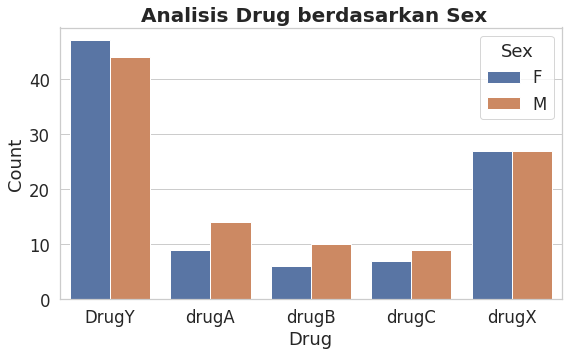

In [ ]:
# Analisis Drug berdasarkan sex

df_Sex_Drug = df.groupby(["Drug", "Sex"]).size().reset_index(name = "Count")

# Atribut figsize memungkinkan kita untuk menentukan lebar dan tinggi suatu gambar dalam satuan inci
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y = "Count", hue = "Sex", data = df_Sex_Drug)
plt.title(" Analisis Drug berdasarkan Sex", fontsize=20, fontweight='bold')
plt.show()

Pengamatan :


*   DrugY diberikan kepada lebih banyak pasien wanita.
*   drugA, drugB dan drugC hanya diberikan kepada lebih banyak pasien laki-laki atau 'M'.
*   drugX diberikan secara merata atau sama kepada pasien pria ('M') dan wanita ('F') .

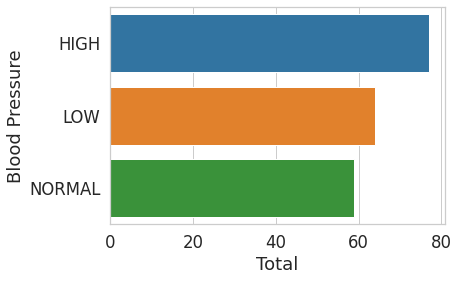

In [ ]:
# Menentukan tema visual untuk semua plot matplotlib dan seaborn. ex: whitegrid, darkgrid, dark, white
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", font='tahoma', font_scale=1.5)
# Menunjukkan jumlah pengamatan di setiap kategori menggunakan bar.
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(
    # nama kolom
    y="BP",
    # data yang di load
    data=df,
    # warna palette ex: flare, dark, pastel, muted, deep, tab10, crest, magma
    palette="tab10") 
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

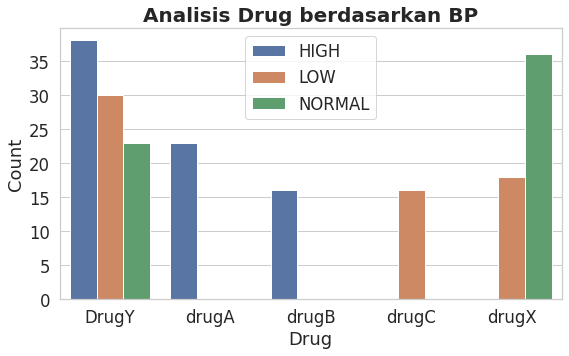

In [ ]:
# Analisis Drug berdasarkan BP

df_Sex_Drug = df.groupby(["Drug", "BP"]).size().reset_index(name = "Count")

# Atribut figsize memungkinkan kita untuk menentukan lebar dan tinggi suatu gambar dalam satuan inci
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y = "Count", hue = "BP", data = df_Sex_Drug)
plt.title("Analisis Drug berdasarkan BP", fontsize=20, fontweight='bold')
plt.legend(loc='upper center')
plt.show()

Pengamatan :


*   DrugY lebih banyak diberikan kepada pasien dengan tekanan darah tinggi.
*   drugA dan drugB hanya dapat diberikan kepada pasien yang tekanan darahnya tinggi atau dalam kategori HIGH.
*   drugC hanya diberikan kepada pasien yang memiliki tekanan darah rendah atau dalam kategori LOW.
*   drugX lebih banyak diberikan kepada pasien yang tekanan darah tingginya Normal atau dalam kategori NORMAL.

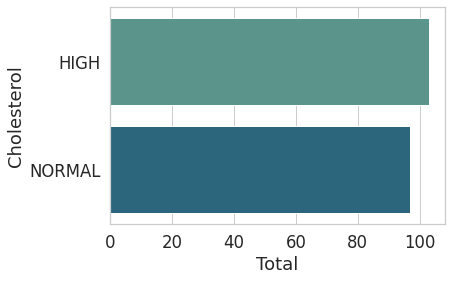

In [ ]:
# Menentukan tema visual untuk semua plot matplotlib dan seaborn. ex: whitegrid, darkgrid, dark, white
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", font='tahoma', font_scale=1.5)
# Menunjukkan jumlah pengamatan di setiap kategori menggunakan bar.
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(
    # nama kolom
    y="Cholesterol",
    # data yang di load
    data=df,
    # warna palette ex: flare, dark, pastel, muted, deep, tab10, crest, magma
    palette="crest") 
plt.ylabel('Cholesterol')
plt.xlabel('Total')
plt.show()

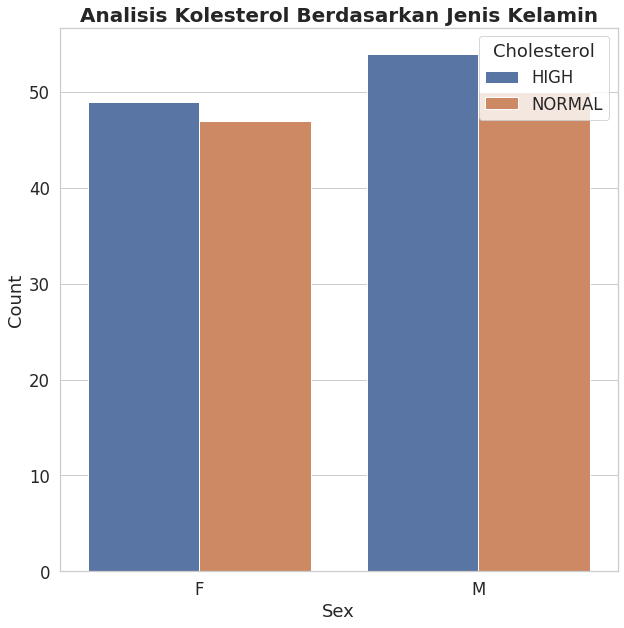

In [ ]:
# Analisis Kolesterol Berdasarkan Jenis Kelamin
df_Sex_Cholesterol = df.groupby(["Sex", "Cholesterol"]).size().reset_index(name = "Count")

# Atribut figsize memungkinkan kita untuk menentukan lebar dan tinggi suatu gambar dalam satuan inci
plt.figure(figsize = (10,10))
sns.barplot(x = "Sex", y = "Count", hue = "Cholesterol", data = df_Sex_Cholesterol)
plt.title("Analisis Kolesterol Berdasarkan Jenis Kelamin", fontsize=20, fontweight='bold')
plt.show()

Jika Diamati bahwa baik dari kategori Wanita atau 'F' maupun Pria atau 'M' dua-duanya menderita kadar kolesterol tinggi. dan yang paling tinggi dari kategori 'M' dengan nilai diatas 50.

In [ ]:
# Hitung tabulasi silang sederhana dari dua (atau lebih) faktor. Secara default menghitung tabel frekuensi faktor kecuali array nilai dan fungsi agregasi dilewatkan.
# https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/
# Tampilan sederhana
# Tampilan sederhana kolom "Sex" & "Drug"
# pd.crosstab(df.Sex,df.Drug)

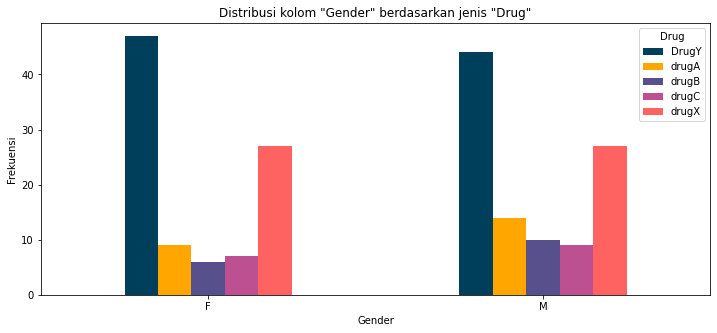

In [5]:
# Tampilan menggunakan plot
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title ('Distribusi kolom "Gender" berdasarkan jenis "Drug"')
plt.xlabel('Gender')
# Rotasi tulisan F & M
plt.xticks(rotation=0)
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# Hitung tabulasi silang sederhana dari dua (atau lebih) faktor. Secara default menghitung tabel frekuensi faktor kecuali array nilai dan fungsi agregasi dilewatkan.
# https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/
# Tampilan sederhana kolom "BP" dan "Cholesterol"
# pd.crosstab(df.BP,df.Cholesterol)

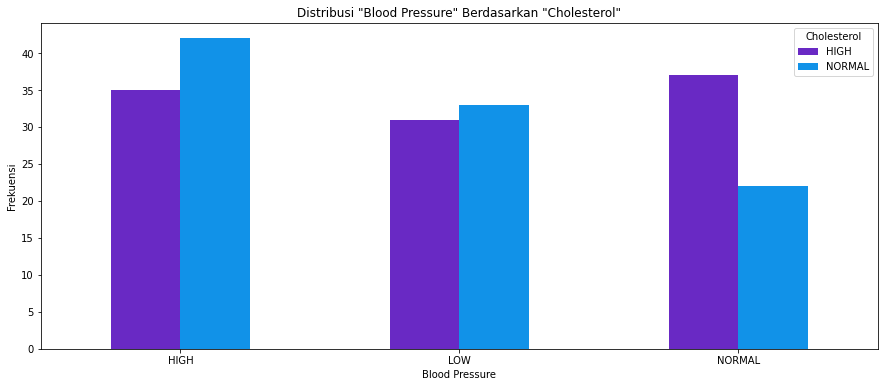

In [6]:
# Tampilan menggunakan plot
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Distribusi "Blood Pressure" Berdasarkan "Cholesterol"')
plt.xlabel('Blood Pressure')
# Rotasi tulisan HIGH, LOW, & NORMAL
plt.xticks(rotation=0)
plt.ylabel('Frekuensi')
plt.show()

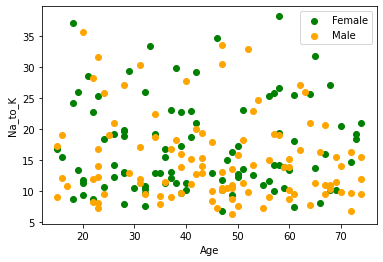

In [7]:
# fungsi scatter() untuk menggambar plot pencar.
# https://www.w3schools.com/python/matplotlib_scatter.asp
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Green")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# **Data Preprocessing**

**Data Binning**

---
Proses Data Binning digunakan untuk menggelompokkan data numerik menjadi beberapa bin agar sebaran data lebih mudah dipahami.




 **Pengelompokkan fitur Usia**

In [ ]:
# mendefinisikan batasan bin usia
bin_age = [0 , 19, 29, 39, 49, 59, 69, 80]
category_age =['<20s', '20s', '30s', '40s', '50s', '60s', '>60s' ]
# binning data menggunakan fungsi cut()
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

**Pengelompokkan fitur Na_to_K**

In [ ]:
# mendefinisikan batasan bin Na_to_K
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
# binning data menggunakan fungsi cut()
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

# **Data Preparation**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Feature Engineering**

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

**SMOTE Technique**

Karena jumlah 'DrugY' lebih banyak dari jenis obat lain, maka dilakukan oversampling untuk menghindari overfitting.

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

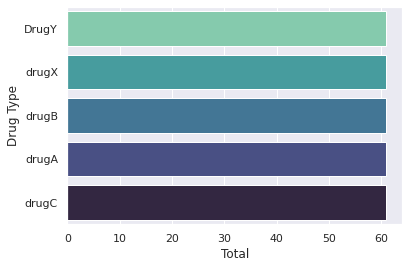

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="darkgrid")
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

# **Model Building**

**K** **Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=25)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       0.61      0.57      0.59        30
       drugA       0.40      0.80      0.53         5
       drugB       0.33      0.33      0.33         3
       drugC       0.29      0.50      0.36         4
       drugX       0.75      0.50      0.60        18

    accuracy                           0.55        60
   macro avg       0.48      0.54      0.48        60
weighted avg       0.60      0.55      0.56        60

[[17  5  1  4  3]
 [ 0  4  1  0  0]
 [ 1  1  1  0  0]
 [ 2  0  0  2  0]
 [ 8  0  0  1  9]]
K Neighbours accuracy is: 55.00%


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 83.33%
